In [62]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


import numpy as np

In [63]:

data = pd.read_csv('tips (data for regression problem).csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
print(data.info())
print(data.describe())
data = pd.get_dummies(data, drop_first=True)
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


# Correlation matrix to see relationships between features and the target variable ('tip')

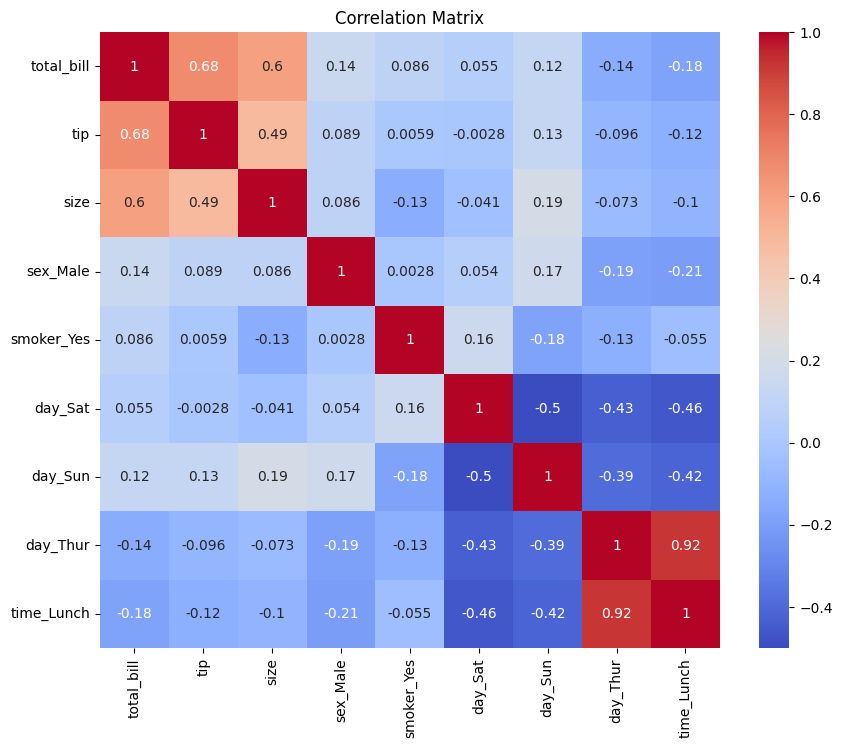

In [65]:

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# Distribution of the target variable 'tip'

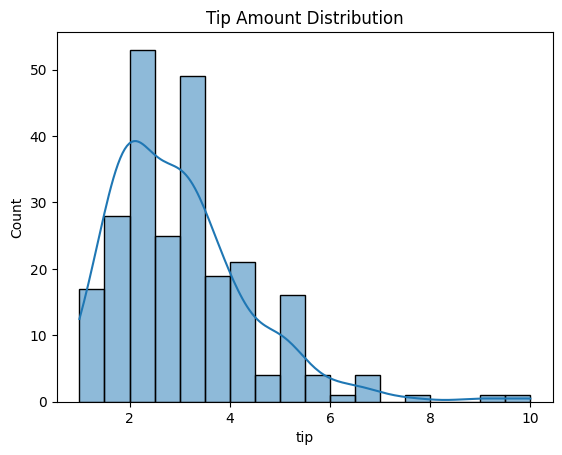

In [66]:
sns.histplot(data['tip'], kde=True)
plt.title('Tip Amount Distribution')
plt.show()

In [67]:
X = data.drop('tip', axis=1)
y = data['tip']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for models sensitive to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [68]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")


Linear Regression - MSE: 0.7033566017436106, R2: 0.43730181943482493


# Ridge Regression

In [69]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")


Ridge Regression - MSE: 0.7020706557358167, R2: 0.4383305998245971


# Lasso Regression

In [70]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")


Lasso Regression - MSE: 0.6122093872788174, R2: 0.5102212625960605


# Decision Tree Regression

In [71]:

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree Regression - MSE: {mse_tree}, R2: {r2_tree}")


Decision Tree Regression - MSE: 0.8489901694047068, R2: 0.32079229446702484


# Random Forest Regression

In [72]:

forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print(f"Random Forest Regression - MSE: {mse_forest}, R2: {r2_forest}")


Random Forest Regression - MSE: 0.8973011076667134, R2: 0.282142657861585


# Support Vector Regression

In [73]:

svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regression - MSE: {mse_svr}, R2: {r2_svr}")


Support Vector Regression - MSE: 1.0814380236699344, R2: 0.1348297480900147


# K-Nearest Neighbors Regression

In [74]:

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Regression - MSE: {mse_knn}, R2: {r2_knn}")


K-Nearest Neighbors Regression - MSE: 0.9029365714285715, R2: 0.27763418350081626



# Feature importance using Random Forest

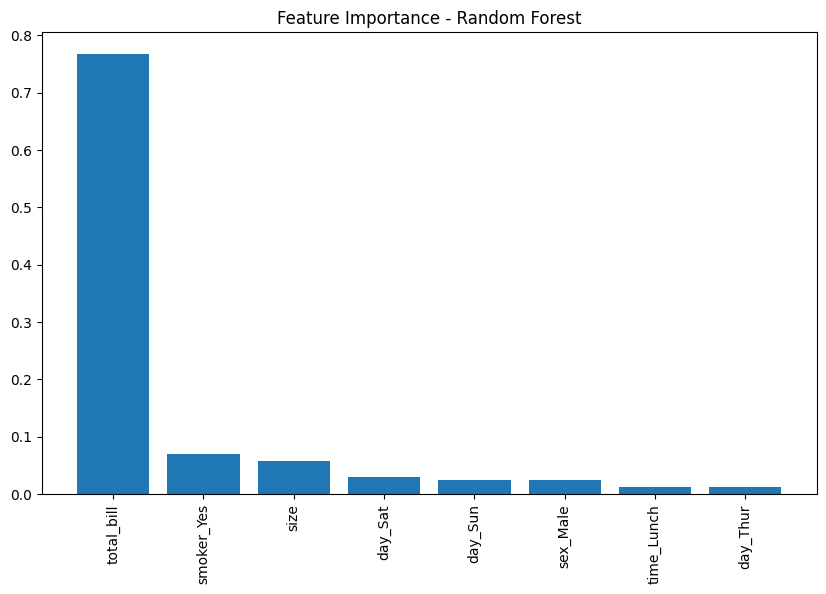

In [75]:


forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()




# Feature Importance - Lasso Regression Coefficients

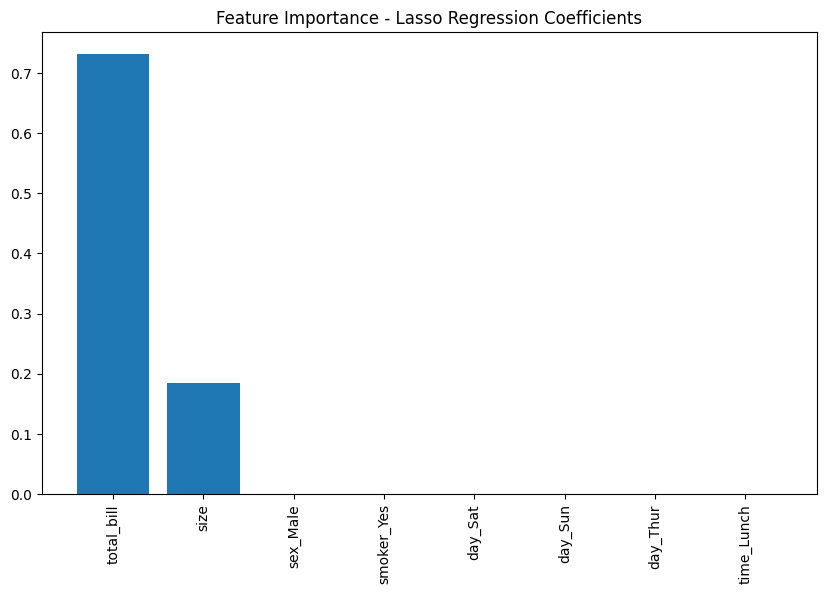

In [76]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_coef = lasso_model.coef_

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Lasso Regression Coefficients")
plt.bar(range(X_train.shape[1]), lasso_coef, align="center")
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.show()

# Evaluating each model

In [77]:

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")
    return mse, r2


evaluate_model(linear_model, X_test, y_test, "Linear Regression")
evaluate_model(ridge_model, X_test_scaled, y_test, "Ridge Regression")
evaluate_model(lasso_model, X_test_scaled, y_test, "Lasso Regression")
evaluate_model(tree_model, X_test, y_test, "Decision Tree Regression")
evaluate_model(forest_model, X_test, y_test, "Random Forest Regression")
evaluate_model(svr_model, X_test_scaled, y_test, "Support Vector Regression")
evaluate_model(knn_model, X_test_scaled, y_test, "K-Nearest Neighbors Regression")


Linear Regression - MSE: 0.70, R²: 0.44
Ridge Regression - MSE: 0.70, R²: 0.44
Lasso Regression - MSE: 0.61, R²: 0.51
Decision Tree Regression - MSE: 0.85, R²: 0.32
Random Forest Regression - MSE: 0.92, R²: 0.26
Support Vector Regression - MSE: 1.08, R²: 0.13
K-Nearest Neighbors Regression - MSE: 0.90, R²: 0.28


(np.float64(0.9029365714285715), 0.27763418350081626)

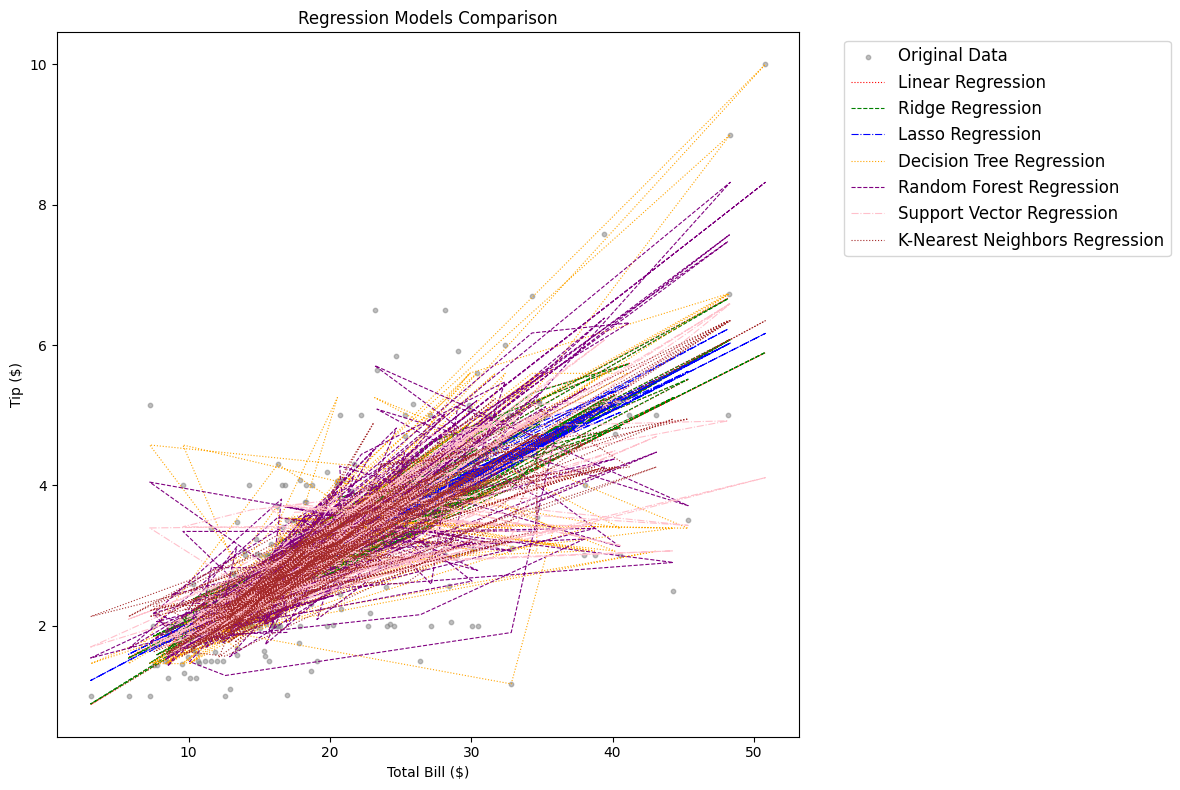

In [ ]:

X = data.drop('tip', axis=1)
y = data['tip']

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(X['total_bill'], y, label='Original Data', alpha=0.5, s=10, color='gray')

ax.plot(X['total_bill'], y_pred_linear, label='Linear Regression', color='red', linestyle=':', linewidth=0.8)
ax.plot(X['total_bill'], y_pred_ridge, label='Ridge Regression', color='green', linestyle='--', linewidth=0.8)
ax.plot(X['total_bill'], y_pred_lasso, label='Lasso Regression', color='blue', linestyle='-.', linewidth=0.8)
ax.plot(X['total_bill'], y_pred_tree, label='Decision Tree Regression', color='orange', linestyle=':', linewidth=0.8)
ax.plot(X['total_bill'], y_pred_forest, label='Random Forest Regression', color='purple', linestyle='--', linewidth=0.8)
ax.plot(X['total_bill'], y_pred_svr, label='Support Vector Regression', color='pink', linestyle='-.', linewidth=0.8)
ax.plot(X['total_bill'], y_pred_knn, label='K-Nearest Neighbors Regression', color='brown', linestyle=':', linewidth=0.8)

ax.set_title('Regression Models Comparison')
ax.set_xlabel('Total Bill ($)')
ax.set_ylabel('Tip ($)')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

fig.tight_layout()

plt.show()

# catter plots between each numerical feature and 'tip' to check for linear relationships

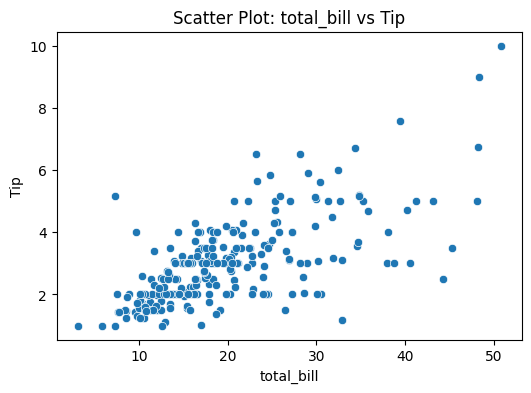

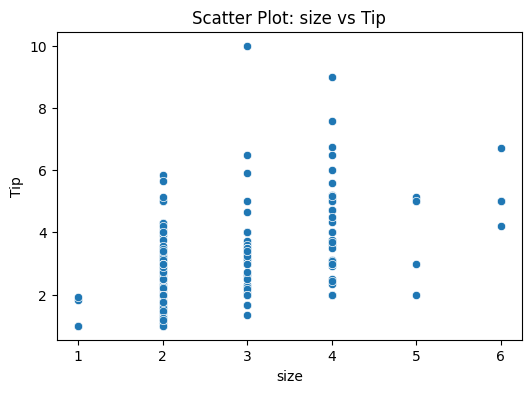

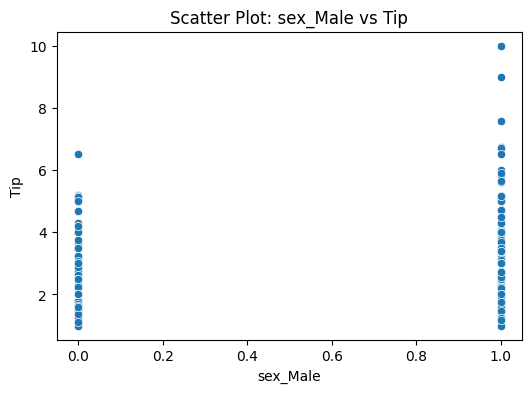

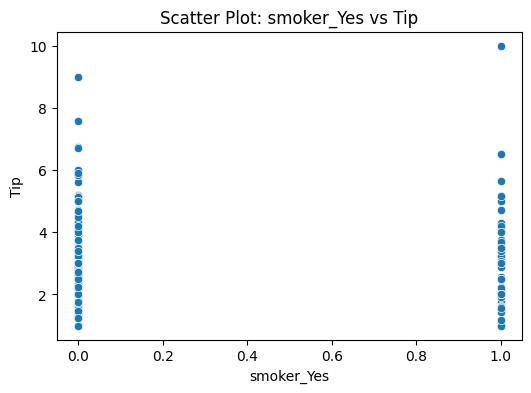

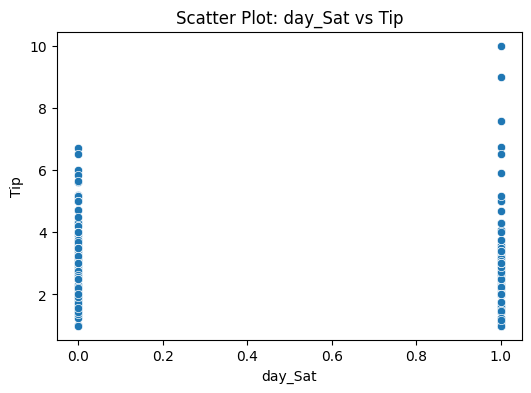

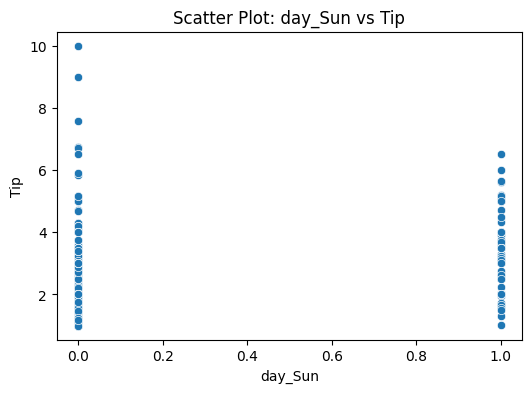

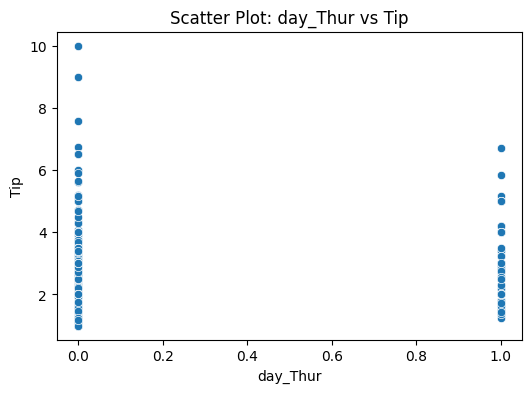

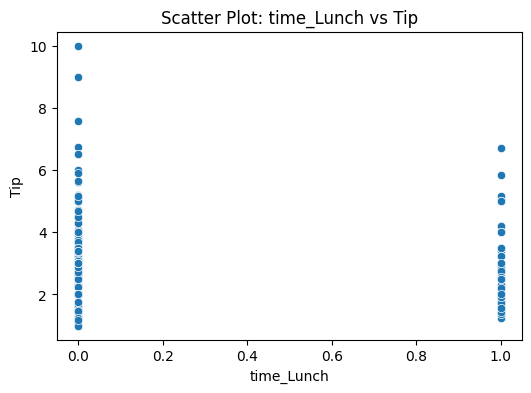

In [ ]:

for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[column], y=data['tip'])
    plt.title(f'Scatter Plot: {column} vs Tip')
    plt.xlabel(column)
    plt.ylabel('Tip')
    plt.show()

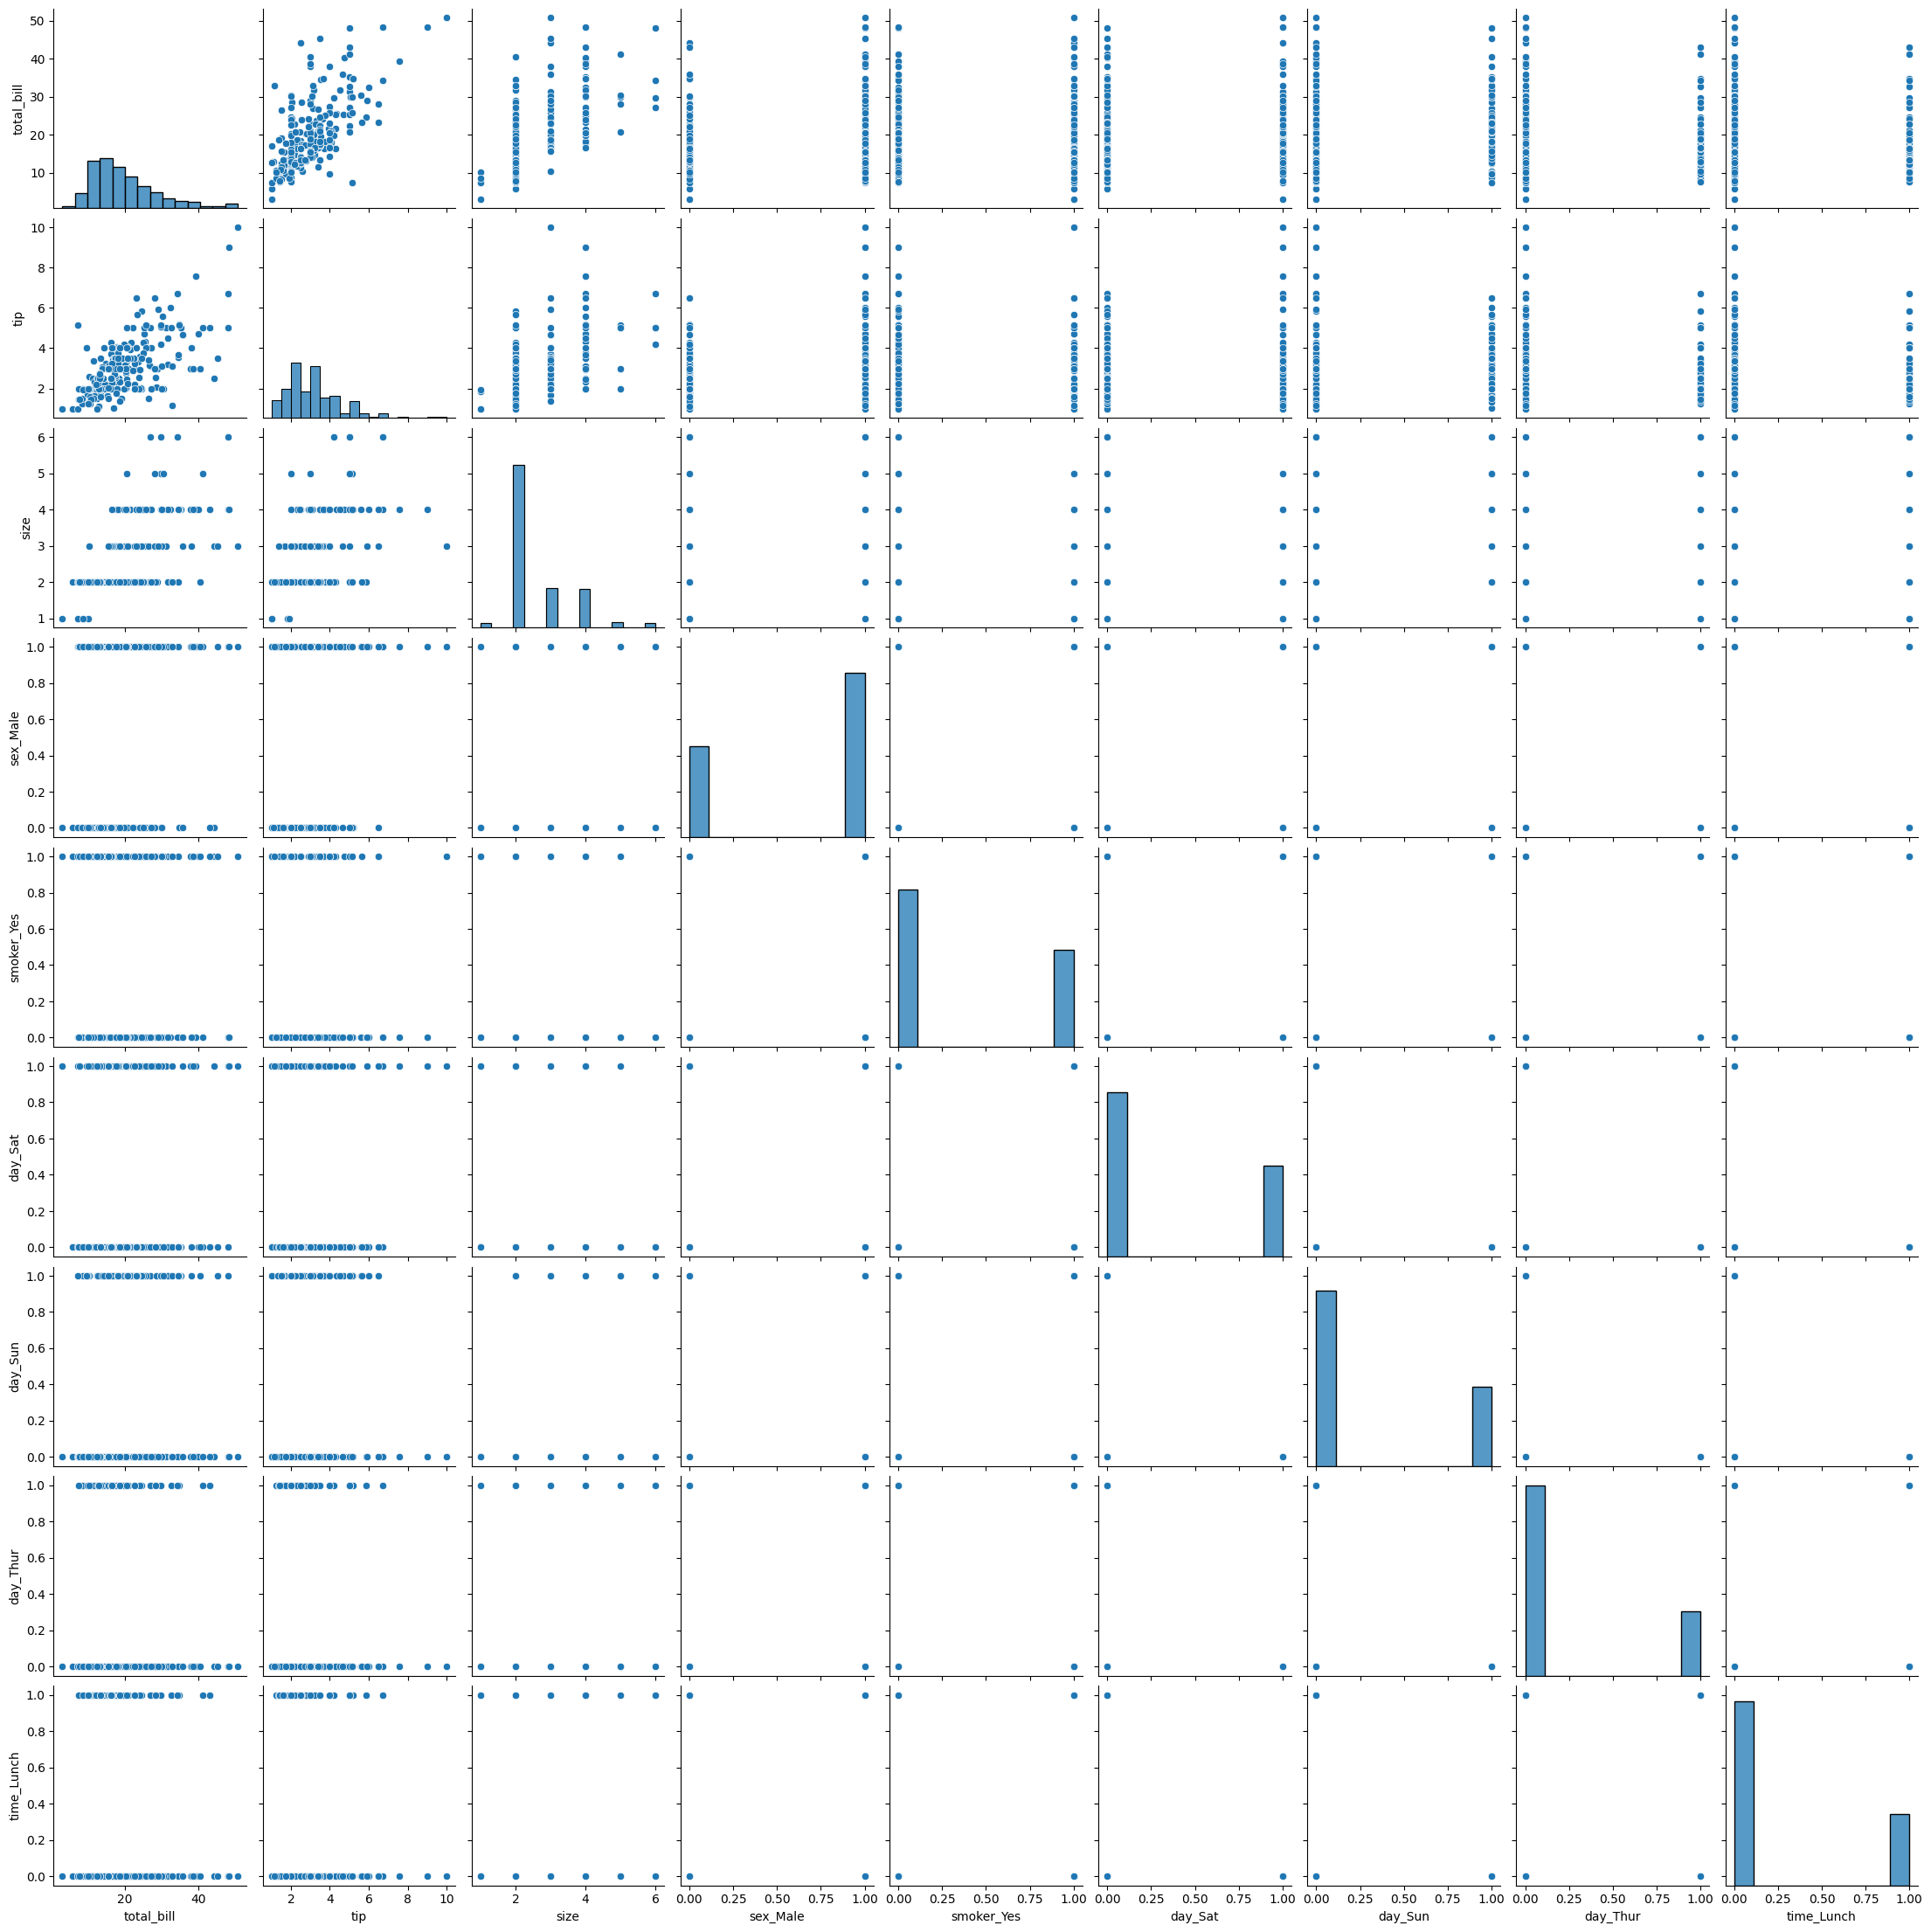

In [79]:
sns.pairplot(data)
plt.show()


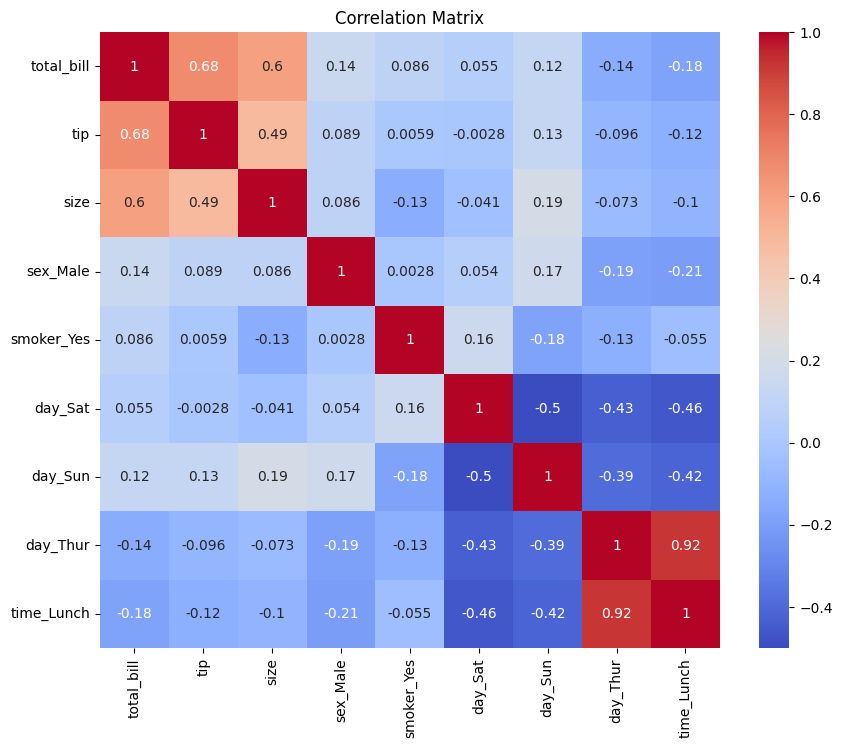

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




# Residual Plot for the linear regression model

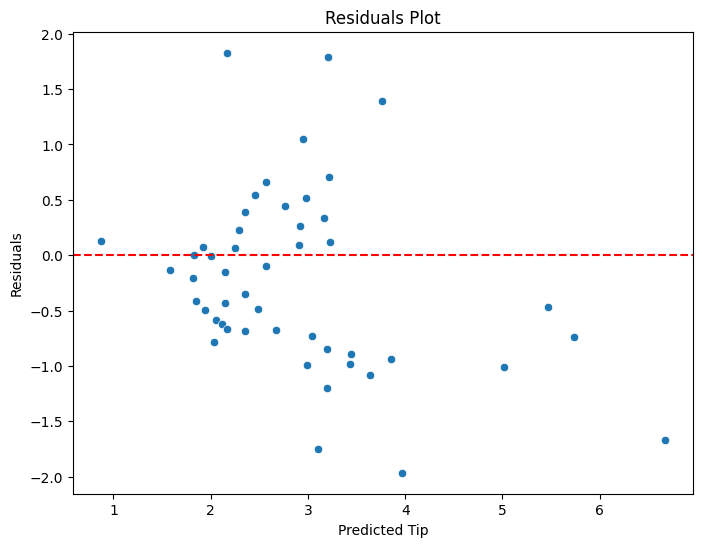

In [ ]:

y_pred = linear_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
